In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read file from location  
file_path = "C:\\Users\\Hasan\\Desktop\\data science folder\\MachineLearningRating_v3.txt"
# Read the file (adjust delimiter as necessary)
df = pd.read_csv(file_path, delimiter='|')

 #Set display options
pd.set_option('display.max_rows', 1000)  # Limit the number of rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print the DataFrame
print(df)

C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\3464166461.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship          LegalType 

In [3]:
if df.isnull().values.any():
    print("The dataset contains missing values.")
else:
    print("No missing values in the dataset.")

The dataset contains missing values.


In [4]:
# Calculate missing values
missing_count = df.isnull().sum()  # Count of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Percentage of missing values

# Combine both into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Display columns with missing data only
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print("Missing Values Summary:")
print(missing_summary)


Missing Values Summary:
                         Missing Count  Missing Percentage
Bank                            145961           14.594670
AccountType                      40232            4.022806
MaritalStatus                     8259            0.825819
Gender                            9536            0.953507
mmcode                             552            0.055195
VehicleType                        552            0.055195
make                               552            0.055195
Model                              552            0.055195
Cylinders                          552            0.055195
cubiccapacity                      552            0.055195
kilowatts                          552            0.055195
bodytype                           552            0.055195
NumberOfDoors                      552            0.055195
VehicleIntroDate                   552            0.055195
CustomValueEstimate             779642           77.956560
CapitalOutstanding              

In [5]:
# Fill missing values for numeric columns with mean
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column] = df[column].fillna(df[column].mean())

# Fill missing values for categorical columns with mode
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify after filling
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [6]:
# Select numerical features
numerical_columns = ['TotalPremium', 'TotalClaims']  # Add other numerical features as needed
numerical_data = df[numerical_columns]

# Ensure no missing values in numerical columns
numerical_data = numerical_data.fillna(0)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(numerical_data.describe())

# Variability Measures
for col in numerical_columns:
    print(f"\nVariability Measures for {col}:")
    variance = numerical_data[col].var()
    std_dev = numerical_data[col].std()
    data_range = numerical_data[col].max() - numerical_data[col].min()
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Range: {data_range:.2f}")



Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability Measures for TotalPremium:
Variance: 53030.96
Standard Deviation: 230.28
Range: 66065.18

Variability Measures for TotalClaims:
Variance: 5683812.15
Standard Deviation: 2384.07
Range: 405094.52


In [7]:
# Check for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Variables:")
print(categorical_columns)

# Check for date columns (if any column contains date values)
date_columns = []
for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        date_columns.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        try:
            pd.to_datetime(df[col])
            date_columns.append(col)
        except ValueError:
            pass
print("\nDate Columns:")
print(date_columns)

# Check sample data to confirm formatting
print("\nSample Data:")
# Check unique values in categorical variables
print("\nUnique Values in Categorical Variables:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")



Categorical Variables:
Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dat


Date Columns:
['TransactionMonth', 'VehicleIntroDate']

Sample Data:

Unique Values in Categorical Variables:
TransactionMonth: 23 unique values
Citizenship: 4 unique values
LegalType: 6 unique values
Title: 5 unique values
Language: 1 unique values
Bank: 11 unique values
AccountType: 3 unique values
MaritalStatus: 3 unique values
Gender: 3 unique values
Country: 1 unique values
Province: 9 unique values
MainCrestaZone: 16 unique values
SubCrestaZone: 45 unique values
ItemType: 1 unique values
VehicleType: 5 unique values
make: 46 unique values
Model: 411 unique values
bodytype: 13 unique values
VehicleIntroDate: 174 unique values
AlarmImmobiliser: 2 unique values
TrackingDevice: 2 unique values
CapitalOutstanding: 1011 unique values
NewVehicle: 2 unique values
WrittenOff: 2 unique values
Rebuilt: 2 unique values
Converted: 2 unique values
CrossBorder: 1 unique values
TermFrequency: 2 unique values
ExcessSelected: 13 unique values
CoverCategory: 28 unique values
CoverType: 22 unique v

Plotting numerical distributions...


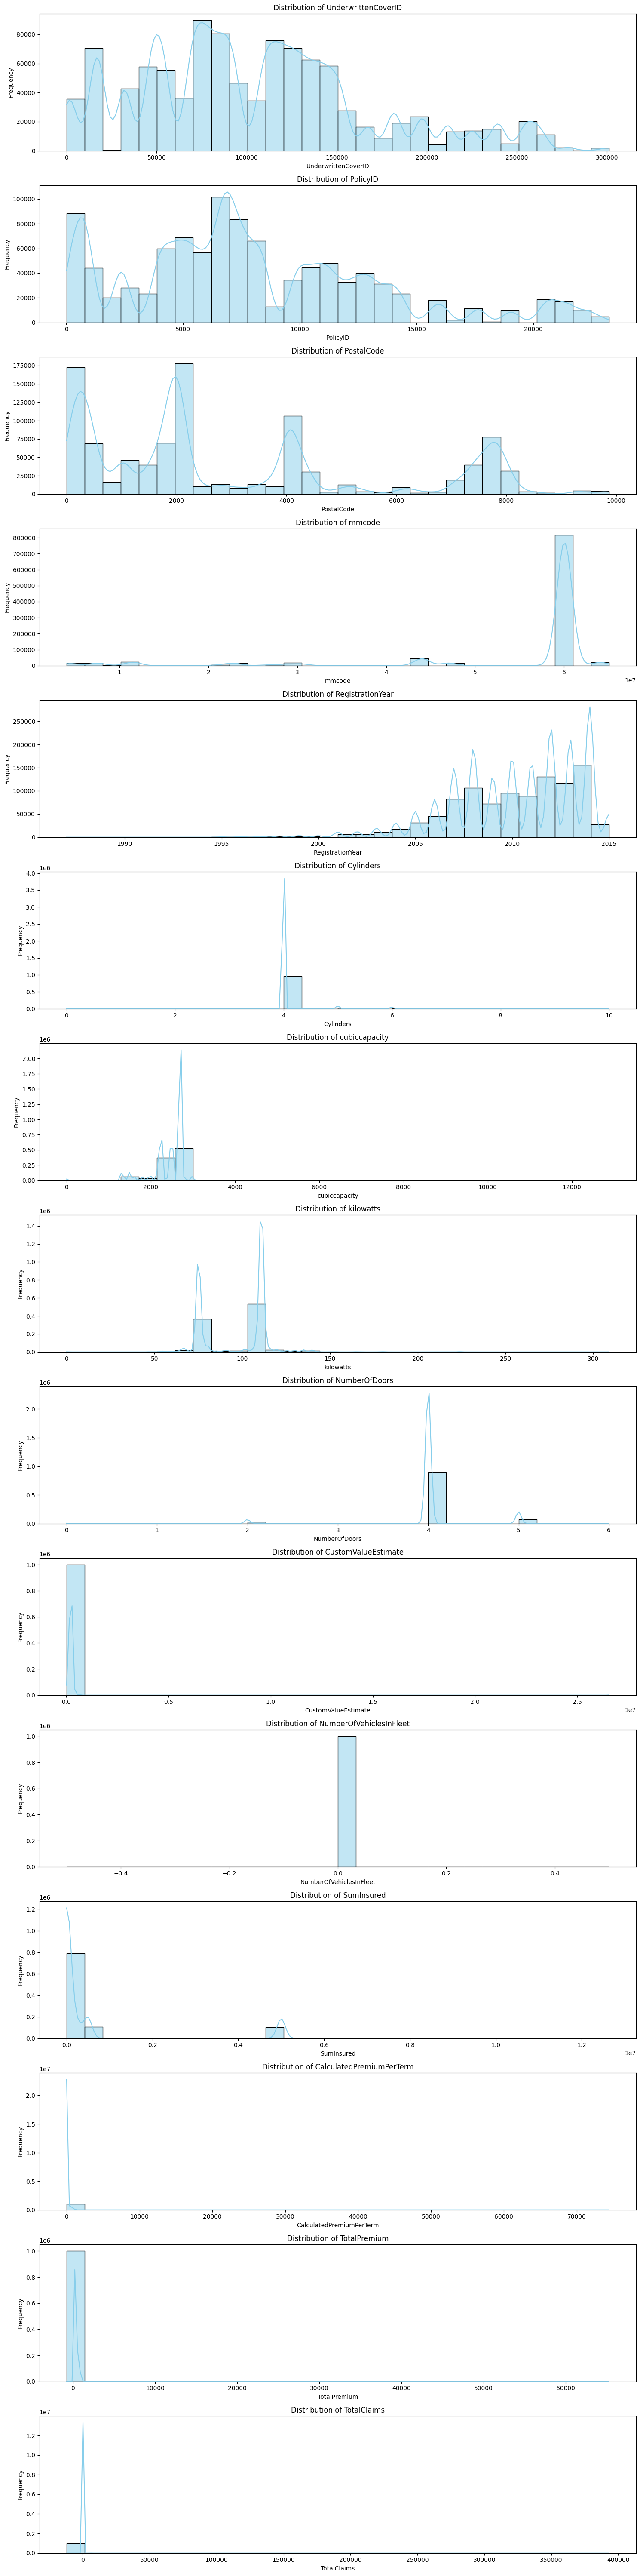

Plotting categorical distributions...


C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\2128446362.py:31: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


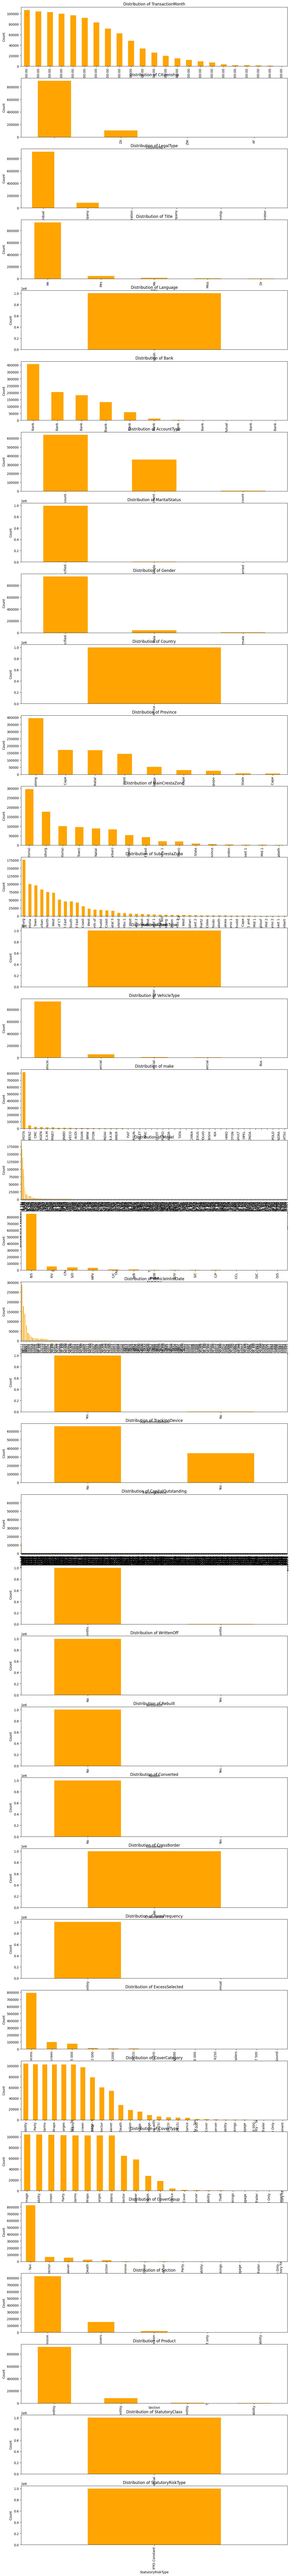

In [8]:
#Univariate Analysis to visualize the distributions of numerical and categorical variables
# Select numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Handle missing values for visualization
df[numerical_columns] = df[numerical_columns].fillna(0)
df[categorical_columns] = df[categorical_columns].fillna('Missing')

# Plot histograms for numerical columns
def plot_numerical_distribution(df, numerical_columns):
    plt.figure(figsize=(15, len(numerical_columns) * 4))
    for i, col in enumerate(numerical_columns):
        plt.subplot(len(numerical_columns), 1, i + 1)
        sns.histplot(df[col], kde=True, color='skyblue', bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot bar charts for categorical columns
def plot_categorical_distribution(df, categorical_columns):
    plt.figure(figsize=(15, len(categorical_columns) * 4))
    for i, col in enumerate(categorical_columns):
        plt.subplot(len(categorical_columns), 1, i + 1)
        df[col].value_counts().plot(kind='bar', color='orange')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Run the plots
print("Plotting numerical distributions...")
plot_numerical_distribution(df, numerical_columns)

print("Plotting categorical distributions...")
plot_categorical_distribution(df, categorical_columns)
   

C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\909740584.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


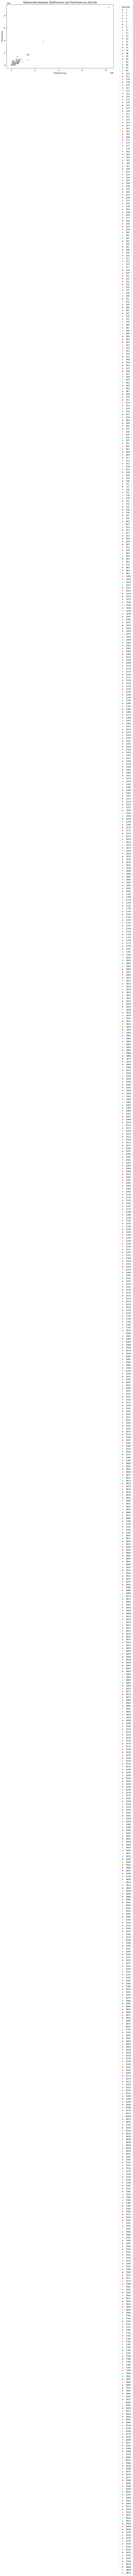

In [9]:

# Handle missing values for TotalPremium and TotalClaims
df['TotalPremium'] = df['TotalPremium'].fillna(0)
df['TotalClaims'] = df['TotalClaims'].fillna(0)

# Ensure ZipCode is treated as categorical
df['PostalCode'] = df['PostalCode'].fillna('Unknown')

# Group data by ZipCode and calculate monthly changes
df_grouped = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].sum().reset_index()

# Scatter plot: TotalPremium vs TotalClaims by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_grouped, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10')
plt.title("Relationship Between TotalPremium and TotalClaims by ZipCode")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="ZipCode")
plt.tight_layout()
plt.show()


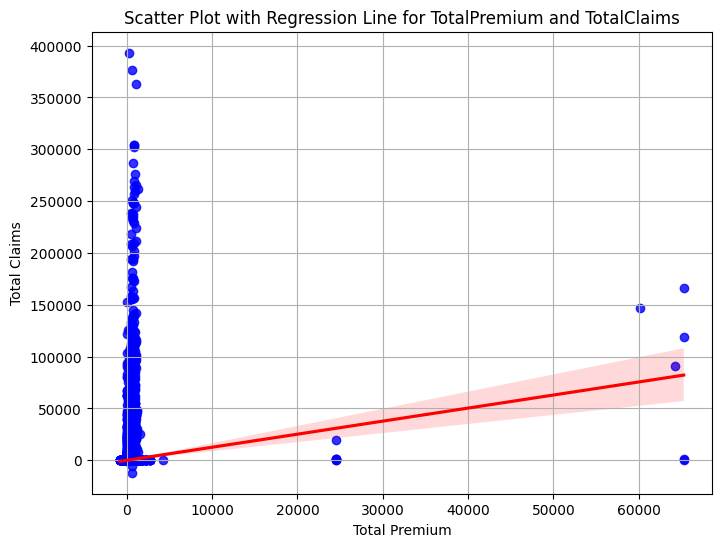

Correlation between TotalPremium and TotalClaims: 0.12


In [22]:
# Calculate correlation matrix
# Scatter plot with regression line for correlation
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='TotalPremium', y='TotalClaims', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Scatter Plot with Regression Line for TotalPremium and TotalClaims")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.grid(True)
plt.show()
correlation = df['TotalPremium'].corr(df['TotalClaims'])
print(f"Correlation between TotalPremium and TotalClaims: {correlation:.2f}")

In [23]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'Province' is the column with provinces
provinces = df['Province'].unique()

# Perform ANOVA (assumes 'CalculatedPremiumPerTerm' represents risk)
risk_by_province = [df[df['Province'] == province]['CalculatedPremiumPerTerm'] for province in provinces]
f_stat, p_value = stats.f_oneway(*risk_by_province)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences across provinces.")
else:
    print("Accept the null hypothesis: There are no significant risk differences across provinces.")

ANOVA Results - F-statistic: 116.11960841621531, p-value: 3.9587382254717424e-195
Reject the null hypothesis: There are significant risk differences across provinces.


In [24]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'PostalCode' represents zip codes
zipcodes = df['PostalCode'].unique()

# Perform ANOVA for postal codes (assuming more than two zip codes are available)
risk_by_zipcode = [df[df['PostalCode'] == zipcode]['CalculatedPremiumPerTerm'] for zipcode in zipcodes]
f_stat, p_value = stats.f_oneway(*risk_by_zipcode)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between zip codes.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between zip codes.")


ANOVA Results - F-statistic: 5.715375005231982, p-value: 0.0
Reject the null hypothesis: There are significant risk differences between zip codes.


In [25]:
# Example: Assuming 'TotalPremium' represents the margin/profit and 'PostalCode' represents zip codes
zipcodes = df['PostalCode'].unique()

# Perform ANOVA for postal codes
profit_by_zipcode = [df[df['PostalCode'] == zipcode]['TotalPremium'] for zipcode in zipcodes]
f_stat, p_value = stats.f_oneway(*profit_by_zipcode)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant margin differences between zip codes.")
else:
    print("Accept the null hypothesis: There are no significant margin differences between zip codes.")

ANOVA Results - F-statistic: 10.81111575835253, p-value: 0.0
Reject the null hypothesis: There are significant margin differences between zip codes.


In [26]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'Gender' represents gender
women_risk = df[df['Gender'] == 'Female']['CalculatedPremiumPerTerm']
men_risk = df[df['Gender'] == 'Male']['CalculatedPremiumPerTerm']

# Perform t-test comparing women vs. men
t_stat, p_value = stats.ttest_ind(women_risk, men_risk)

print(f'T-test Results - t-statistic: {t_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between women and men.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between women and men.")

T-test Results - t-statistic: -1.7063669128128982, p-value: 0.08794605068006252
Accept the null hypothesis: There are no significant risk differences between women and men.


In [27]:
# Relevant features
features = ['Province', 'PostalCode', 'VehicleType', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'SumInsured', 'CalculatedPremiumPerTerm']
target = 'TotalClaims'

# Remove rows with missing values in the selected columns
df_clean = df.dropna(subset=features + [target])

# Group by PostalCode and fit a model for each
zipcodes = df_clean['PostalCode'].unique()
zipcode_models = {}

for zipcode in zipcodes:
    zipcode_data = df_clean[df_clean['PostalCode'] == zipcode]
    
    # Check if the number of samples is sufficient for train-test split
    if len(zipcode_data) < 2:
        print(f"Skipping zipcode {zipcode} due to insufficient data.")
        continue  # Skip this zipcode
    
    # Define features (X) and target (y)
    X = zipcode_data[features]
    y = zipcode_data[target]
    
    # One-hot encode categorical columns (like VehicleType, make, etc.)
    X = pd.get_dummies(X, drop_first=True)
    
    # Train-Test Split for each zipcode's dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the model and its error
    zipcode_models[zipcode] = {'model': model, 'mse': mse}

    print(f"Zipcode {zipcode} - MSE: {mse}")

   

Zipcode 1459 - MSE: 0.0
Zipcode 1513 - MSE: 0.0
Zipcode 1619 - MSE: 69093.6152083547
Zipcode 1625 - MSE: 241.77169253467977
Zipcode 1629 - MSE: 0.0
Zipcode 1852 - MSE: 227536.05968801433
Zipcode 1982 - MSE: 1352.7878462801978
Zipcode 2007 - MSE: 0.0
Zipcode 2066 - MSE: 919328.5622060761
Zipcode 4093 - MSE: 1546783.78277442
Zipcode 2000 - MSE: 3276150.1198398136
Zipcode 1577 - MSE: 0.0
Zipcode 1610 - MSE: 1194904.5821271823
Zipcode 2410 - MSE: 53453.74706601319
Zipcode 6200 - MSE: 4.323638515467987
Zipcode 122 - MSE: 2868113.787528239
Zipcode 1520 - MSE: 27.686520177297943
Zipcode 1709 - MSE: 377412.9494717235
Zipcode 1739 - MSE: 4267687.461210572
Zipcode 4000 - MSE: 11186164.011626525
Zipcode 4066 - MSE: 130338.81561103024
Zipcode 4091 - MSE: 1110975.938056006
Zipcode 4342 - MSE: 0.0
Zipcode 4359 - MSE: 106359.52732168583
Zipcode 7784 - MSE: 10045225.71252445
Zipcode 970 - MSE: 0.0
Zipcode 6213 - MSE: 216496.13715359257
Zipcode 6390 - MSE: 0.0
Zipcode 1868 - MSE: 3942344.3313682075
Zip

In [28]:
from scipy.stats import ttest_ind, chi2_contingency
# Select the feature for segmentation (e.g., "CoverType")
feature_to_test = "CoverType"

# Split into Group A (Control) and Group B (Test)
group_a = df[df[feature_to_test] == "Basic"]  # Control: Baseline feature
group_b = df[df[feature_to_test] == "Comprehensive"]  # Test: Feature to test

# Validate group similarity (Numerical Columns)
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']
for col in numerical_columns:
    stat, p_value = ttest_ind(group_a[col].dropna(), group_b[col].dropna())
    print(f"T-test for {col}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"WARNING: {col} is significantly different between groups (p < 0.05).")
    else:
        print(f"{col} is not significantly different between groups (p >= 0.05).")

# Validate group similarity (Categorical Columns)
categorical_columns = ['Gender', 'Province', 'VehicleType']
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[feature_to_test])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"WARNING: {col} is significantly different between groups (p < 0.05).")
    else:
        print(f"{col} is not significantly different between groups (p >= 0.05).")


C:\Users\Hasan\AppData\Local\Temp\ipykernel_2772\144004621.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = ttest_ind(group_a[col].dropna(), group_b[col].dropna())


T-test for TotalPremium: p-value = nan
TotalPremium is not significantly different between groups (p >= 0.05).
T-test for TotalClaims: p-value = nan
TotalClaims is not significantly different between groups (p >= 0.05).
T-test for SumInsured: p-value = nan
SumInsured is not significantly different between groups (p >= 0.05).
Chi-squared test for Gender: p-value = 0.0000
Chi-squared test for Province: p-value = 0.0000
Chi-squared test for VehicleType: p-value = 0.0000


In [29]:
import scipy.stats as stats
#Chi-Squared Test (for Categorical Variables)
# Create a contingency table for 'Gender' and 'IsVATRegistered'
contingency_table = pd.crosstab(df['Gender'], df['IsVATRegistered'])

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Gender and VAT registration status.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Gender and VAT registration status.")


Chi-Squared Statistic: 263.28272357121875
P-Value: 6.743463113631323e-58
Degrees of Freedom: 2
Expected Frequencies:
[[6.72107296e+03 3.39270402e+01]
 [4.26019513e+04 2.15048716e+02]
 [9.45751976e+05 4.77402424e+03]]
Reject the null hypothesis: There is a significant relationship between Gender and VAT registration status.


In [30]:
#T-Test (for Numerical Variables)
# Split the data by 'Gender' and extract 'TotalPremium' for each group
group_male = df[df['Gender'] == 'Male']['TotalPremium'].dropna()
group_female = df[df['Gender'] == 'Female']['TotalPremium'].dropna()

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_male, group_female)

# Output results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in TotalPremium between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in TotalPremium between males and females.")


T-Statistic: -5.118420932688848
P-Value: 3.0925282750010697e-07
Reject the null hypothesis: There is a significant difference in TotalPremium between males and females.


In [31]:
#Z-Test (for Large Samples or Known Population Variance)
# Example: Testing if the mean TotalClaims is significantly different from a population mean of 50
population_mean = 50
sample_mean = df['TotalClaims'].mean()
population_std = df['TotalClaims'].std()  # Assuming you know the population standard deviation
sample_size = len(df['TotalClaims'])

# Calculate the standard error
standard_error = population_std / (sample_size ** 0.5)

# Calculate the z-statistic
z_stat = (sample_mean - population_mean) / standard_error

# Calculate the p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Output results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean TotalClaims is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The mean TotalClaims is not significantly different from the population mean.")


Z-Statistic: 6.233830671845967
P-Value: 4.551650167883281e-10
Reject the null hypothesis: The mean TotalClaims is significantly different from the population mean.
